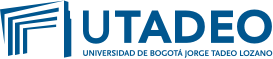

## **APRENDIZAJE AUTOMÁTICO (009841-P-1BG-2S-2025)**

## **Grupo 1** (Edison, Angelica Maria, Maria del Pilar, Juan Esteban)

## **Proyecto: Análisis Exploratorio del Mercado de Autos Usados en Colombia**

### **Objetivo Principal**
Utilizando la base de datos de Fasecolda, nuestro objetivo es entender qué factores (como marca, cilindraje, peso, etc.) influyen en el precio de un auto usado en Colombia.

### **Metodología: "Vibe Coding"**
Abordaremos este problema no como una lista de tareas, sino como un ciclo de exploración. Haremos una pregunta, usaremos el código para "sentir" la respuesta en los datos y dejaremos que los hallazgos guíen nuestra siguiente pregunta. Usaremos las bibliotecas vistas (Pandas, Matplotlib, Seaborn, etc.) como nuestras herramientas de exploración.

### **Flujo de Trabajo y Preguntas Guía**

**Paso 1: El Primer Contacto (Carga y "Vibe Check" Inicial)**
*   **Pregunta:** ¿Con qué datos contamos?
*   **Acciones de Código:** Cargar el dataset (desde CSV o SQLite). Usar `df.head()`, `df.info()`, `df.columns` para un primer vistazo.
*   **Pregunta Clave:** ¿Hay datos faltantes o columnas que no parecen correctas a primera vista? (`df.isnull().sum()`)

In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("/content/guia_fasecolda.csv")

# Primeras filas
print("Primeras filas del dataset:")
display(df.head())

# Información general del DataFrame
print("\nInformación del dataset:")
df.info()

# Nombres de las columnas
print("\nColumnas del dataset:")
print(df.columns.tolist())


Primeras filas del dataset:


,Novedad,Marca,Clase,Codigo,HomologoCodigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,...,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
0,M,ALEKO,AUTOMOVIL,101001,NaN,2141,1.6,MT 1600CC TAXI,1380,2,...,5,0,5,0,2,Activo,GSL,4X2,0,1
1,M,AMERICAN MOTOR,CAMIONETA PASAJ.,206001,NaN,EAGLE,SUMMIT,AT 2400CC LX 4P,0,1,...,5,0,5,0,2,Activo,NaN,NaN,0,1
2,M,AMERICAN MOTOR,CAMPERO,208003,NaN,WRANGLER,4.2,MT 4200CC CAB,1100,1,...,5,0,3,1,2,Activo,NaN,4X4,0,1
3,M,AMERICAN MOTOR,CAMPERO,208004,NaN,WRANGLER,4.2,MT 2500CC CARPADO,1100,1,...,5,0,3,1,2,Activo,NaN,4X4,0,1
4,M,AUTECO,MOTOCICLETA,317003,NaN,SUMA,80,MT 80CC 2T,75,1,...,2,0,0,0,2,Activo,GSL,2X1,0,1



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12433 entries, 0 to 12432
Data columns (total 76 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Novedad             12433 non-null  object 
 1   Marca               12433 non-null  object 
 2   Clase               12433 non-null  object 
 3   Codigo              12433 non-null  int64  
 4   HomologoCodigo      0 non-null      float64
 5   Referencia1         12433 non-null  object 
 6   Referencia2         12433 non-null  object 
 7   Referencia3         12433 non-null  object 
 8   Peso                12433 non-null  int64  
 9   IdServicio          12433 non-null  int64  
 10  Servicio            12433 non-null  object 
 11  1970                12433 non-null  int64  
 12  1971                12433 non-null  int64  
 13  1972                12433 non-null  int64  
 14  1973                12433 non-null  int64  
 15  1974                12433 n

Contamos con datos de **identificación del vehículo** (Novedad, Marca, Clase, Codigo, HomologoCodigo, Referencia1, Referencia2, Referencia3),

**especificaciones técnicas** (Peso, Servicio, Potencia, TipoCaja, Cilindraje, Nacionalidad, CapacidadPasajeros, CapacidadCarga, Puertas, AireAcondicionado, Ejes, Estado, Combustible, Transmision, Um, PesoCategoria),

**información económica histórica** (columnas de 1970 a 2018),

y otros **atributos adicionales** (Bcpp, Importado, IdServicio).

El archivo guia_fasecolda.csv contiene información de identificación de vehículos (marca, clase, códigos y referencias), sus características técnicas (cilindraje, potencia, tipo de caja, capacidad, combustible, peso, entre otros) y valores económicos históricos registrados entre 1970 y 2018. Además, incluye atributos complementarios como nacionalidad, estado e importación, lo que permite un análisis integral de cada vehículo en el tiempo.

**Pregunta Clave**: “¿Hay datos faltantes o columnas que no parecen correctas a primera vista?”, en Colab puedes ejecutar:

In [2]:
# Revisión de datos faltantes por columna
df.isnull().sum()

,0
Novedad,0
Marca,0
Clase,0
Codigo,0
HomologoCodigo,12433
...,...
Estado,0
Combustible,726
Transmision,700
Um,0


Con base en la salida de `df.isnull().sum()`, se observa que la mayoría de las columnas no presentan valores faltantes. Sin embargo, algunas variables sí requieren atención:

* `HomologoCodigo` presenta una cantidad considerable de nulos (12.433 registros), lo que indica que este campo no siempre aplica o no fue diligenciado.

* `Combustible` y `Transmision` tienen valores faltantes moderados (726 y 700 respectivamente), lo cual podría deberse a inconsistencias en el registro o a que ciertos vehículos no tienen estas especificaciones claramente definidas.

* El resto de columnas, incluyendo identificación, características técnicas y valores históricos por año, no muestran datos faltantes.

**En resumen**: el dataset está bastante completo, pero sería recomendable analizar si `HomologoCodigo`, `Combustible` y `Transmision` deben ser imputados, depurados o tratados como casos especiales.

**Paso 2: Entendiendo las Variables Individualmente (Análisis Univariado)**
*   **Pregunta:** ¿Cómo se distribuyen las características principales?
*   **Acciones de Código:**
    *   ¿Cuáles son los rangos de precios y cilindraje? (`df.describe()`).
    *   Visualizar la distribución de los precios con un histograma o un boxplot. ¿Hay valores atípicos?
    *   ¿Cuáles son las marcas de autos más comunes en el dataset? (`df['Marca'].value_counts()`).

📌 **1. Resumen estadístico de precios y cilindraje**

In [3]:
# Resumen estadístico de columnas numéricas
df.describe()

# Resumen puntual de cilindraje
print("Resumen de Cilindraje:")
print(df['Cilindraje'].describe())


Resumen de Cilindraje:
count    12433.000000
mean      2584.716319
std       2308.234051
min          0.000000
25%       1339.000000
50%       1998.000000
75%       3246.000000
max      15950.000000
Name: Cilindraje, dtype: float64


El análisis univariado del cilindraje muestra un total de 12.433 registros válidos, con un valor promedio cercano a 2.585 cc. La mayoría de los vehículos se concentran entre 1.339 cc y 3.246 cc, aunque existen valores extremos: desde 0 cc (posibles registros erróneos o vehículos especiales) hasta 15.950 cc, lo que indica la presencia de outliers correspondientes probablemente a vehículos de carga pesada o inconsistencias en los datos.

📌 **2. Distribución de precios (valores históricos)**

Suponiendo que los precios están en las columnas de años (`1970` a `2018`), podemos analizar la última columna de precios disponible (ej. `2018`) o hacer un análisis combinado.

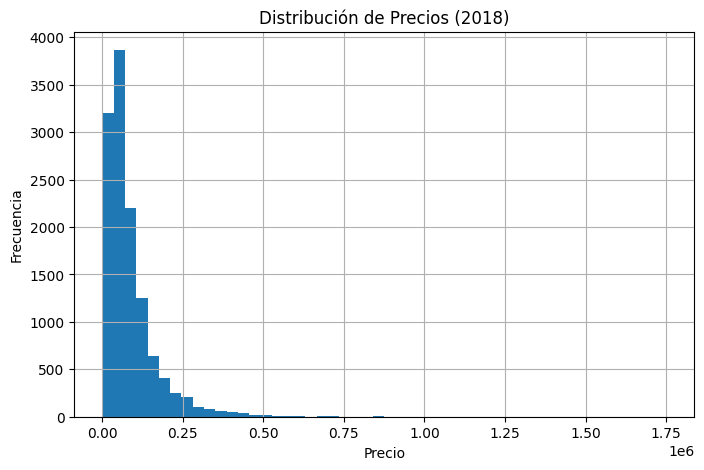

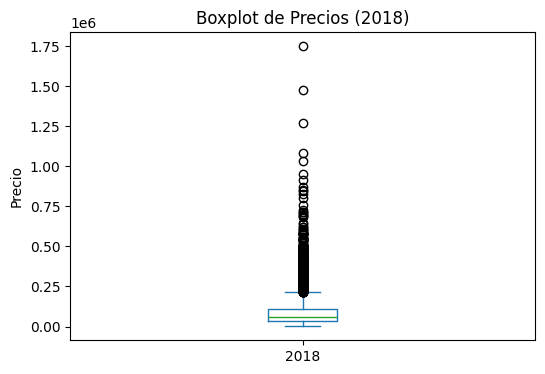

In [4]:
import matplotlib.pyplot as plt

# Histograma de precios del último año disponible
df['2018'].dropna().hist(bins=50, figsize=(8,5))
plt.title("Distribución de Precios (2018)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot para ver outliers
plt.figure(figsize=(6,4))
df['2018'].dropna().plot(kind='box')
plt.title("Boxplot de Precios (2018)")
plt.ylabel("Precio")
plt.show()

**Distribución de Precios (2018):**

* La mayoría de los vehículos se concentran en precios bajos, principalmente por debajo de 200.000.

* Existe una caída rápida en la frecuencia a medida que el precio aumenta → es decir, son pocos los vehículos con precios altos.

* La distribución está claramente sesgada a la derecha (right-skewed): muchos autos de bajo costo y pocos de alto costo.

* Existen valores atípicos (outliers) que superan incluso el millón, pero son casos poco frecuentes.

**En conclusión**: el mercado de 2018 se caracteriza por una amplia oferta de vehículos económicos, con algunos modelos de lujo o de gama alta que elevan la cola de la distribución.

**El Boxplot de Precios (2018) muestra:**

* Mediana: el precio típico de los vehículos está en un rango bajo (cercano a 50.000–60.000 aprox.).

* Rango intercuartílico (IQR): la mayoría de los precios (50% central) se concentra entre valores relativamente bajos, lo que coincide con la distribución sesgada vista antes.

* Outliers: existen muchos valores atípicos que superan ampliamente el rango normal, algunos incluso por encima de 1.7 millones.

* La caja pequeña y el gran número de puntos dispersos hacia arriba confirman que la distribución está fuertemente sesgada a la derecha: pocos vehículos de gama alta elevan la cola de la distribución.

**En resumen**: en 2018, la mayoría de los vehículos tenían precios bajos, pero había una presencia notable de autos de gama alta o de lujo que aparecen como outliers en el mercado.

**Resumen comparativo entre el histograma y el boxplot de precios (2018):**

📊 **Histograma**

* La gran mayoría de los vehículos en 2018 tienen precios concentrados en valores bajos.

* La distribución es asimétrica positiva (sesgada a la derecha): pocos vehículos con precios muy altos generan una cola larga.

* Los vehículos más comunes se ubican en rangos por debajo de los 250.000 aprox., mientras que los valores superiores son poco frecuentes.

📈 **Boxplot**

* Confirma que la mediana está en un rango bajo (≈50.000–60.000).

* La caja del IQR es pequeña, lo que indica que la mayor parte de los precios están muy agrupados.

* Existe una alta presencia de outliers: vehículos de gama media-alta y de lujo con precios que superan el millón.

* Estos valores extremos explican la cola larga observada en el histograma.

✅ **Conclusión conjunta**:
El mercado de vehículos en 2018 está dominado por unidades de bajo costo, pero existe un segmento reducido de vehículos de gama alta que, aunque poco frecuentes, elevan notablemente la dispersión y generan asimetría en la distribución.

📌 **3. Marcas más comunes**

In [6]:
# Top 10 marcas más frecuentes
df['Marca'].value_counts().head(10)

,count
Marca,
CHEVROLET,953
MERCEDES BENZ,505
HYUNDAI,494
VOLKSWAGEN,493
NISSAN,492
BMW,481
KIA,444
FORD,422
RENAULT,418


El análisis de la variable **Marca** muestra que las más representadas en el dataset son **Chevrolet (953 registros)**, seguida por **Mercedes Benz (505)**, **Hyundai (494)** y **Volkswagen (493)**. También destacan **Nissan, BMW, Kia, Ford, Renault y Toyota**, todas con más de **400 registros**. Esto indica que el conjunto de datos está dominado por marcas de alta presencia en el mercado colombiano, con un claro liderazgo de Chevrolet.

**Paso 3: Descubriendo Relaciones (Análisis Bivariado y Agregación)**
*   **Pregunta:** ¿Cómo interactúan las variables entre sí para afectar el precio?
*   **Acciones de Código:**
    *   **¿El cilindraje afecta el precio?** -> Un gráfico de dispersión (`scatterplot`) de `Cilindraje` vs. `Precio` es ideal aquí.
    *   **¿Cuál es el precio promedio por marca de auto?** -> `df.groupby('Marca')['Precio_2017'].mean().sort_values()`.
    *   **¿Los autos de qué marca son, en promedio, más pesados?** -> `df.groupby('Marca')['Peso'].mean()`.

**📌 1. ¿El cilindraje afecta el precio?**

Un scatterplot entre `Cilindraje` y un año de precios (ej. `2017`):

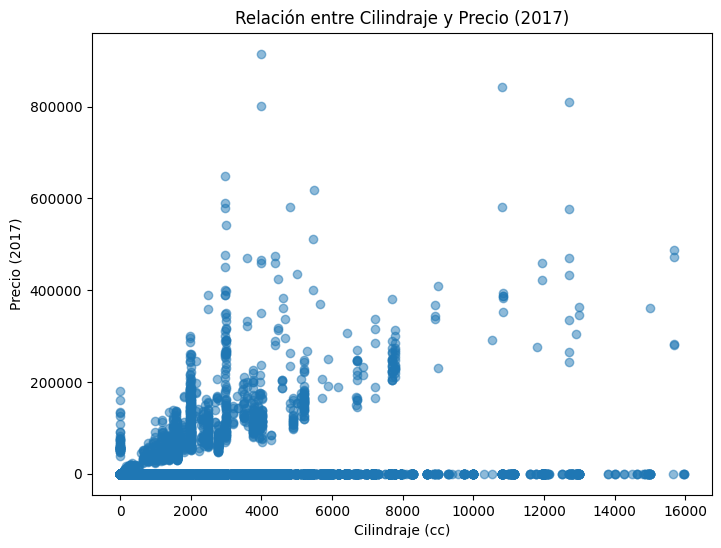

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Cilindraje'], df['2017'], alpha=0.5)
plt.title("Relación entre Cilindraje y Precio (2017)")
plt.xlabel("Cilindraje (cc)")
plt.ylabel("Precio (2017)")
plt.show()

**Resumen interpretativo de la gráfica de dispersión Cilindraje vs. Precio (2017):**

📊 **Resumen del gráfico**

* Existe una tendencia positiva: a mayor cilindraje, en promedio, los precios tienden a ser más altos.

* Sin embargo, la relación no es lineal ni perfecta; se observan grandes dispersiones en los precios para un mismo cilindraje.

* La mayoría de los vehículos se concentran entre 1.000 cc y 3.000 cc, con precios generalmente por debajo de 200.000.

* Existen valores atípicos tanto en cilindraje (vehículos con más de 10.000 cc) como en precio (superiores a 800.000), lo que corresponde probablemente a vehículos de lujo o de uso especial.

* También se observa una franja de puntos en el eje inferior (precio muy bajo independientemente del cilindraje), que podrían ser datos atípicos o errores de registro.

✅ **Conclusión**:
El cilindraje sí influye en el precio de los vehículos, pero no de manera determinante. Otros factores (marca, tipo de vehículo, año, características adicionales) también juegan un papel clave en la variación del precio.

**📌 2. Precio promedio por marca**

In [8]:
precio_promedio_marca = df.groupby('Marca')['2017'].mean().sort_values(ascending=False)
print(precio_promedio_marca.head(10))  # Top 10 marcas más costosas

Marca
DAF                152500.000000
FUSO               124413.043478
SCANIA             104827.777778
DS                 100000.000000
PORSCHE             90539.393939
MASERATI            84000.000000
TALLERES CEPEDA     58200.000000
TECNITRAILER        56300.000000
JAGUAR              53900.000000
SERVITRACK          50000.000000
Name: 2017, dtype: float64


El análisis del **precio promedio por marca (2017)** muestra que las más costosas corresponden principalmente a fabricantes de **vehículos de carga y gama alta**. En primer lugar está **DAF** con un promedio de **\$152.500**, seguida por **FUSO (\$124.413)** y **Scania (\$104.828)**, todas marcas reconocidas por camiones y buses. Entre las de lujo destacan **DS (\$100.000)**, **Porsche (\$90.539)** y **Maserati (\$84.000)**. Esto indica que el mayor valor promedio se concentra en **vehículos pesados y marcas premium**, en contraste con las marcas masivas que tienden a tener valores menores.

**📌 3. Peso promedio por marca**

In [9]:
peso_promedio_marca = df.groupby('Marca')['Peso'].mean().sort_values(ascending=False)
print(peso_promedio_marca.head(10))  # Top 10 marcas más pesadas

Marca
IFA                12762.333333
STEYR              12003.000000
MARMON             11200.000000
KAMAZ              10560.000000
EUROSTAR D`LONG     9420.000000
DAF                 9317.000000
BISON TRUCK         8766.666667
TECNIPESADOS        8766.666667
CIMC                8195.000000
TECNISANDER         8000.000000
Name: Peso, dtype: float64


El análisis del **peso promedio por marca** evidencia que los vehículos más pesados pertenecen principalmente a fabricantes de **camiones y transporte de carga**. Destacan **IFA (12.762 kg)**, **Steyr (12.003 kg)** y **Marmon (11.200 kg)**, seguidos por **Kamaz, Eurostar D’Long y DAF**, todos con promedios superiores a **9 toneladas**. Esto confirma que las marcas con mayor peso están asociadas a vehículos de gran capacidad, diseñados para el transporte pesado.

### **Preguntas para Pensar Más Allá (Perfectas para Postgrado)**

**1. Enriquecimiento de Datos:**
*   ¿Con qué otra base de datos trabajarías para obtener más valor de estos datos? Piensa en fuentes como datos de accidentalidad (SOAT), datos económicos (inflación, TRM) o demográficos (DANE).

**2. Aprendizaje Automático:**
*   **Aprendizaje Supervisado (Regresión):** Basado en nuestro objetivo, la pregunta es clara: **¿Podemos construir un modelo que prediga el precio de un vehículo usado (`variable objetivo`) utilizando sus características como cilindraje, peso, marca y año (`features`)?**
*   **Aprendizaje No Supervisado (Clustering):** ¿Podemos identificar "segmentos" o "clusters" naturales de vehículos sin conocer su precio? Por ejemplo, **¿Puede un algoritmo agrupar los vehículos en categorías como "City Cars Económicos", "SUVs Familiares" o "Sedanes de Lujo" basándose únicamente en sus especificaciones?**

***Respuestas:***

**1. Enriquecimiento de Datos**

El valor del dataset aumentaría al conectarlo con otras fuentes externas:

* Datos de accidentalidad y siniestralidad (SOAT / RUNT / Fasecolda siniestros): permitirían correlacionar características de los vehículos (cilindraje, peso, edad, marca) con su nivel de riesgo en la vía. Esto serviría para estudios actuariales y de aseguramiento.

* Indicadores económicos (Banco de la República – TRM, inflación, IPC): ayudarían a ajustar precios históricos por inflación y convertirlos a dólares, generando comparabilidad internacional y análisis real de depreciación.

* Datos demográficos y de movilidad (DANE, MinTransporte): permitirían relacionar los tipos de vehículos con zonas geográficas, niveles socioeconómicos o patrones de movilidad.

* Datos ambientales (Ministerio de Ambiente, emisiones por tipo de combustible): abrirían la puerta a evaluar el impacto ecológico de la flota y apoyar políticas de transición energética.

Esto permitiría no solo analizar vehículos de forma aislada, sino contextualizarlos en seguridad vial, economía, sociedad y medioambiente.

**2. Aprendizaje Automático**

**a) Supervisado (Regresión):**

La pregunta es: ¿Podemos predecir el precio de un vehículo usado en un año dado (ej. 2017–2018) en función de sus características?

* Variable objetivo (y): precio en un año específico.

* Features (X): cilindraje, peso, marca (one-hot encoding), clase, tipo de combustible, año de fabricación.

* Modelos candidatos: regresión lineal múltiple, random forest, XGBoost, redes neuronales.

* Aplicación: predicción de precios de mercado, cálculo de seguros, valor residual de flotas.

**b) No Supervisado (Clustering):**

La pregunta es: ¿Podemos agrupar los vehículos en segmentos naturales según sus atributos, sin usar el precio?

* Variables: cilindraje, peso, capacidad de pasajeros, combustible, transmisión.

* Métodos: K-Means, DBSCAN, clustering jerárquico.

* Posibles clusters resultantes:

  * “City Cars económicos” → bajo cilindraje, poco peso, gasolina.

  * “SUVs familiares” → capacidad de pasajeros alta, potencia media, peso intermedio.

  * “Camiones de carga pesada” → alto peso y cilindraje, diésel.

  * “Deportivos y lujo” → alta potencia, menor capacidad, marcas premium.

* Aplicación: segmentación de mercado, tarificación diferenciada de seguros, estrategias comerciales.

**En resumen:**
Con estos pasos, tu dataset no solo sirve para describir vehículos, sino que puede convertirse en insumo para modelos predictivos de precios, segmentación de mercado, estudios de riesgo y hasta políticas públicas de movilidad y sostenibilidad.

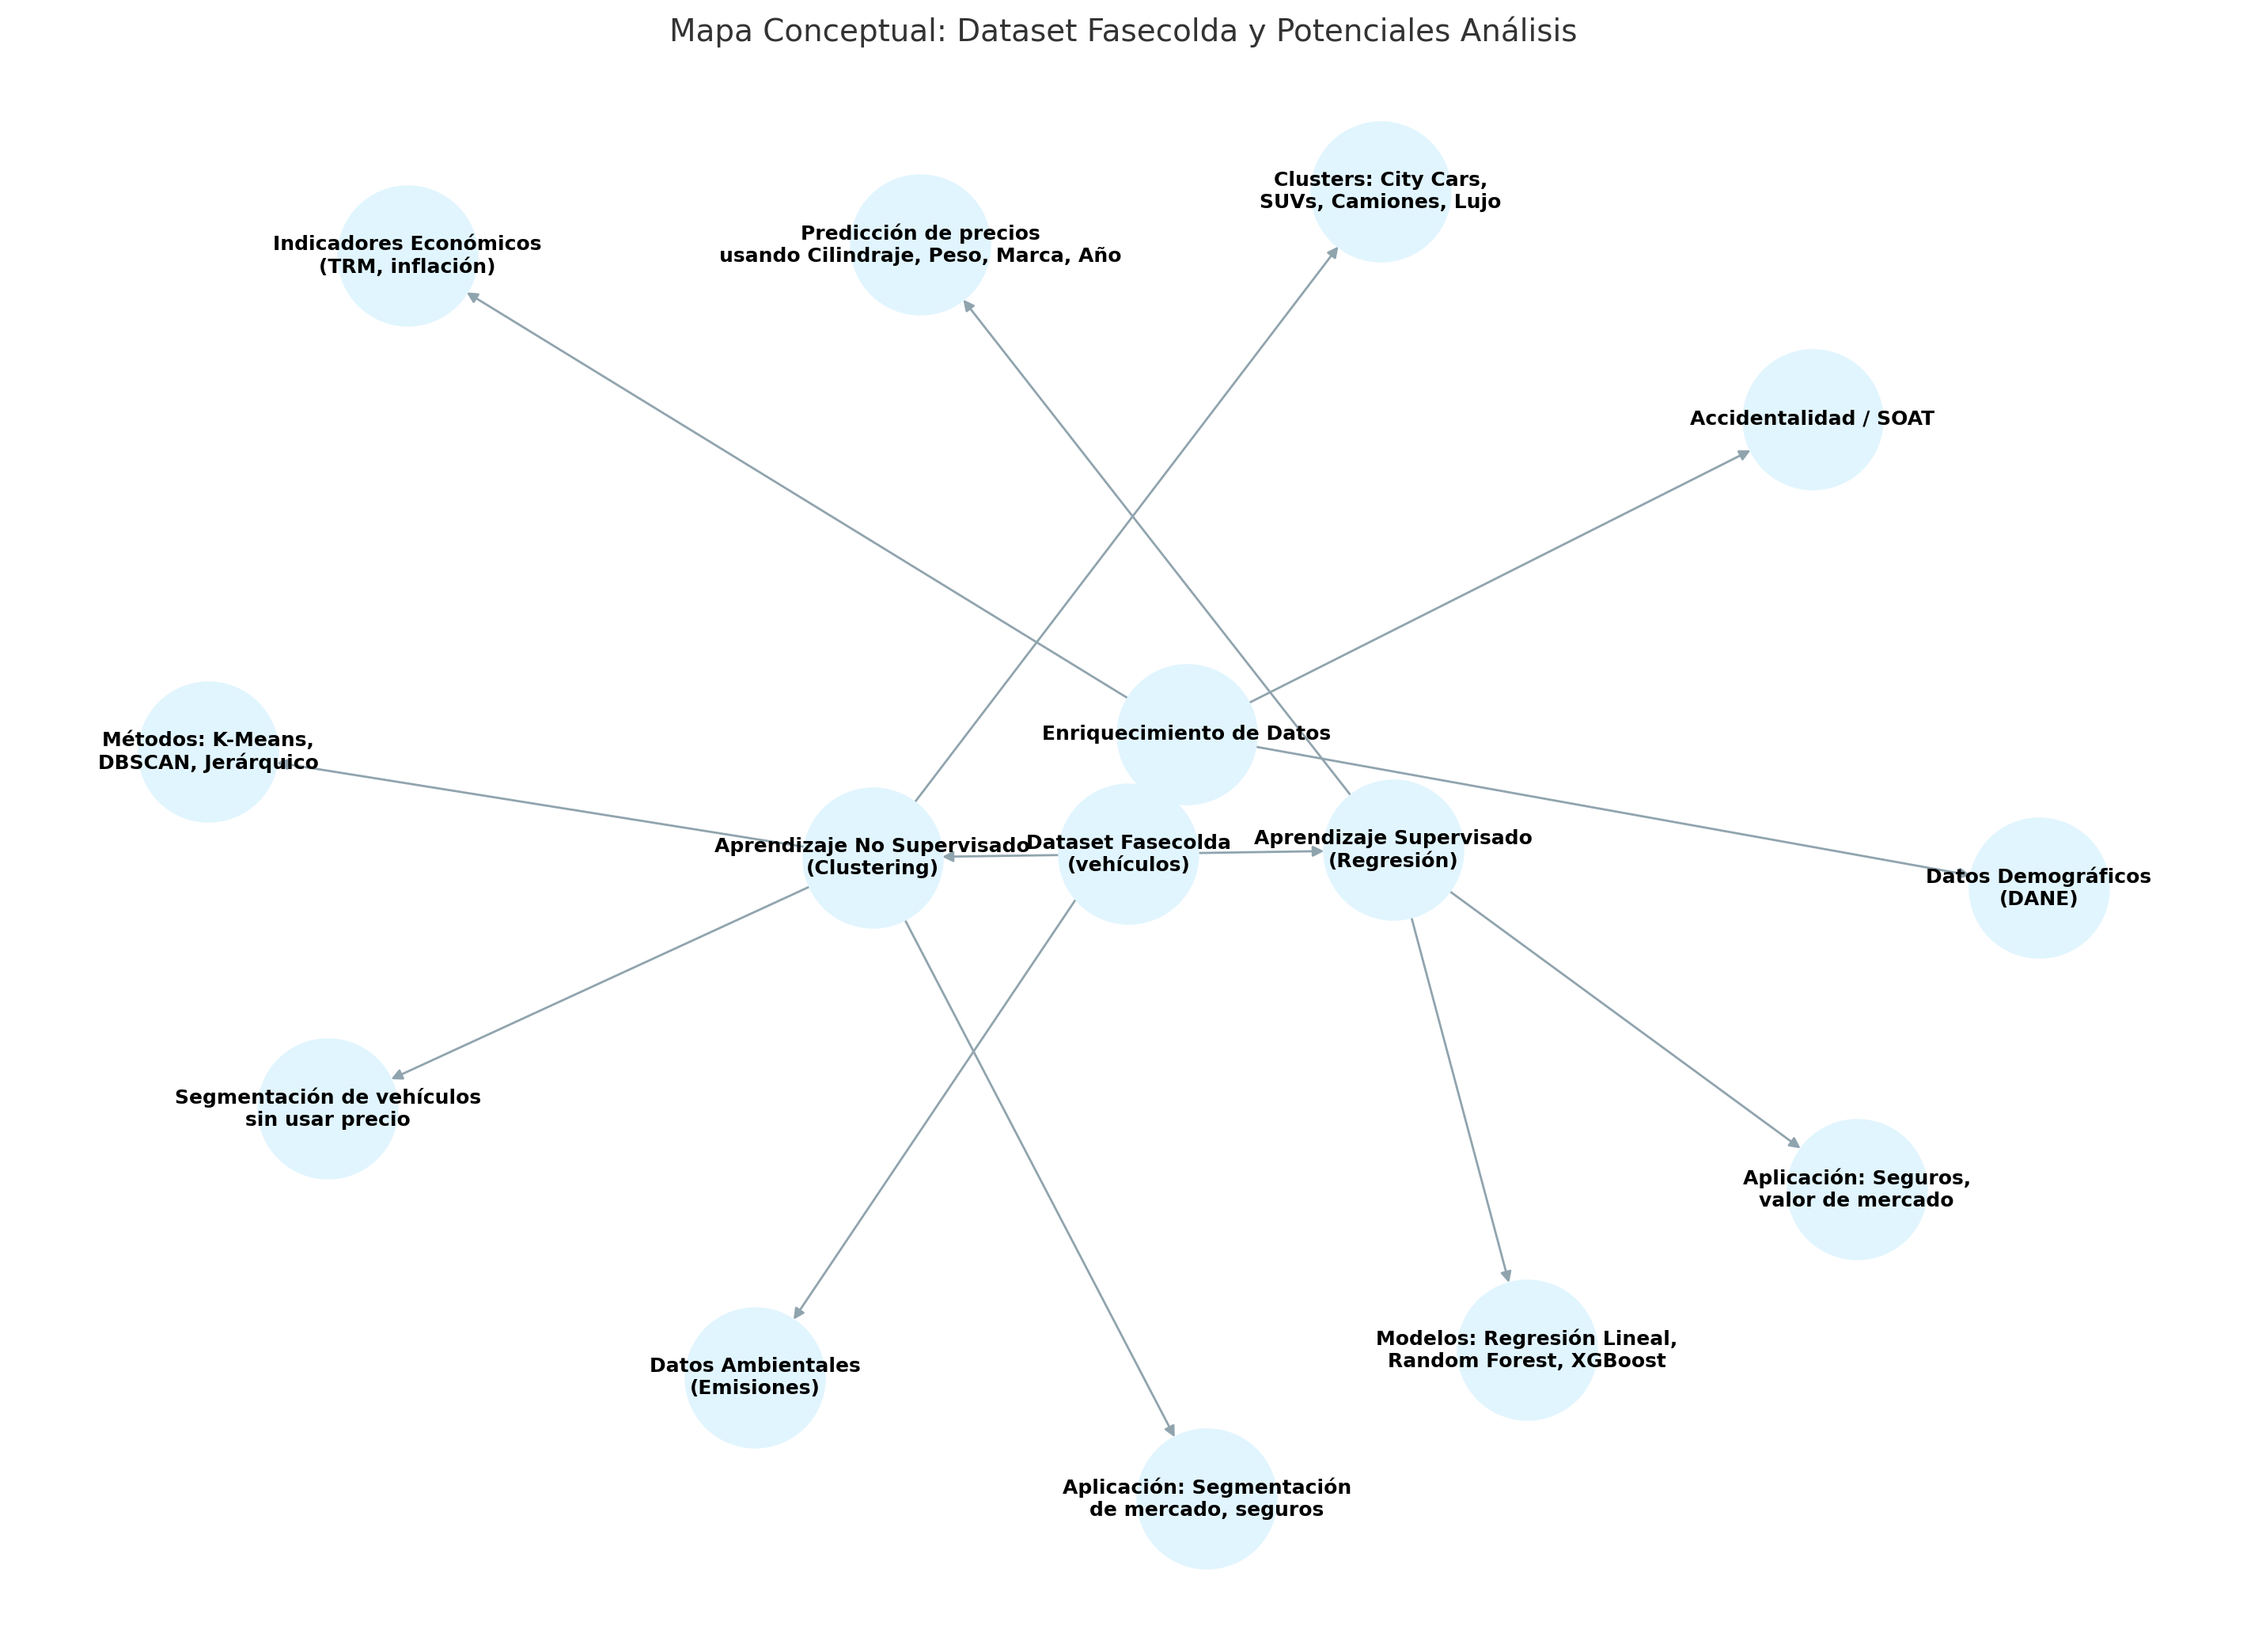

**Mapa conceptual** que conecta el dataset de Fasecolda con:

* Enriquecimiento de datos (accidentalidad, economía, demografía, ambiente),

* Aprendizaje supervisado (predicción de precios),

* Aprendizaje no supervisado (segmentación de vehículos).

De esta forma se visualiza cómo tu base puede expandirse y convertirse en un recurso estratégico para investigación, seguros y movilidad.